In [194]:
import pickle
import numpy as np
import math
from IPython.display import display
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

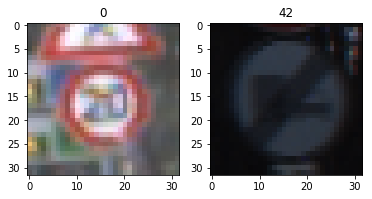

In [195]:
# loading pickled dataset
with open('train.p', 'rb') as f:
    data = pickle.load(f)
# Load the feature data to the variable X_train    
X_train = data['features']
# Load the label data to the variable Y_train
Y_train = data['labels']

# Visualizing dataset
plt.subplot(1, 2, 1)
plt.imshow(X_train[0])
plt.title('{}'.format(Y_train[0]))
plt.subplot(1, 2, 2)
plt.imshow(X_train[39208])
plt.title('{}'.format(Y_train[39208]))
plt.show()

In [196]:
# Making sure to pass these tests. 
assert np.array_equal(X_train, data['features']), 'X_train not set to data[\'features\'].'
assert np.array_equal(Y_train, data['labels']), 'Y_train not set to data[\'labels\'].'
print (X_train.shape)
print('Data shape tests passed.')

(39209, 32, 32, 3)
Data shape tests passed.


In [197]:
# Shuffle the data
from sklearn.utils import shuffle
X_train, Y_train = shuffle(X_train, Y_train)

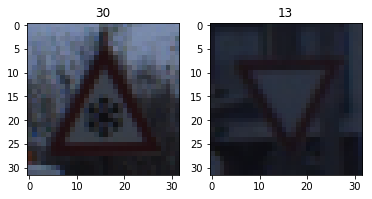

Data shuffling tests passed.


In [198]:
# Checking training data shape and whether the data is shuffled. 
assert X_train.shape == data['features'].shape, 'X_train has changed shape. The shape shouldn\'t change when shuffling.'
assert Y_train.shape == data['labels'].shape, 'Y_train has changed shape. The shape shouldn\'t change when shuffling.'
assert not np.array_equal(X_train, data['features']), 'X_train not shuffled.'
assert not np.array_equal(Y_train, data['labels']), 'Y_train not shuffled.'
# visualize shuffled data
plt.subplot(1, 2, 1)
plt.imshow(X_train[0])
plt.title('{}'.format(Y_train[0]))
plt.subplot(1, 2, 2)
plt.imshow(X_train[39208])
plt.title('{}'.format(Y_train[39208]))
plt.show()
print('Data shuffling tests passed.')

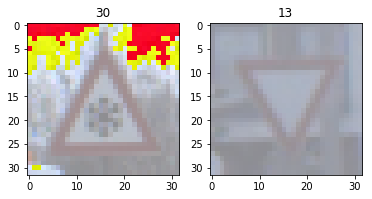

In [199]:
# Implement Min-Max scaling in the normalize() function to a range of a = -0.5 and b = 0.5. 
# After scaling, the values of the pixels in the input data should range from -0.5 to 0.5.

def normalize_grayscale(image_data):
    a = -0.5
    b = 0.5
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )

X_normalized = normalize_grayscale(X_train)
# plot normalized data
plt.subplot(1, 2, 1)
plt.imshow(X_normalized[0])
plt.title('{}'.format(Y_train[0]))
plt.subplot(1, 2, 2)
plt.imshow(X_normalized[39208])
plt.title('{}'.format(Y_train[39208]))
plt.show()


In [200]:
# Check if data is normalized to range -0.5 to 0.5
assert math.isclose(np.min(X_normalized), -0.5, abs_tol=1e-5) and math.isclose(np.max(X_normalized), 0.5, abs_tol=1e-5), 'The range of the training data is: {} to {}.  It must be -0.5 to 0.5'.format(np.min(X_normalized), np.max(X_normalized))
print('Normalization tests passed.')

Normalization tests passed.


In [201]:
# One-Hot encode the labels to the variable y_one_hot
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_one_hot = label_binarizer.fit_transform(Y_train)
display(y_one_hot[0])
display(y_one_hot[39208])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [202]:
# Checking ONE-HOT shape
import collections
assert y_one_hot.shape == (39209, 43), 'y_one_hot is not the correct shape.  It\'s {}, it should be (39209, 43)'.format(y_one_hot.shape)
assert next((False for y in y_one_hot if collections.Counter(y) != {0: 42, 1: 1}), True), 'y_one_hot not one-hot encoded.'
print('ONE-HOT encoding tests passed.')

ONE-HOT encoding tests passed.


In [203]:
from keras.models import Sequential
model = Sequential()
# Build a Multi-layer feedforward neural network with Keras here.
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.activations import relu, softmax

# Set the first layer to a Flatten layer with the input_shape set to (32, 32, 3)
model.add(Flatten(input_shape=(32, 32, 3)))
# Set the second layer to Dense layer width to 128 output.
model.add(Dense(128))
# Use a ReLU activation function after the second layer.
model.add(Activation('relu'))
# Set the output layer width to 43, since there are 43 classes in the dataset.
model.add(Dense(43))
# Use a softmax activation function after the output layer.
model.add(Activation('softmax'))

print ('{} layers total'.format(len(model.layers)))

5 layers total


In [204]:
# Checking Keras layers

def check_layers(layers, true_layers):
    assert len(true_layers) != 0, 'No layers found'
    for layer_i in range(len(layers)):
        assert isinstance(true_layers[layer_i], layers[layer_i]), 'Layer {} is not a {} layer'.format(layer_i+1, layers[layer_i].__name__)
    assert len(true_layers) == len(layers), '{} layers found, should be {} layers'.format(len(true_layers), len(layers))

check_layers([Flatten, Dense, Activation, Dense, Activation], model.layers)

assert model.layers[0].input_shape == (None, 32, 32, 3), 'First layer input shape is wrong, it should be (32, 32, 3)'
assert model.layers[1].output_shape == (None, 128), 'Second layer output is wrong, it should be (128)'
assert model.layers[2].activation == relu, 'Third layer not a relu activation layer'
assert model.layers[3].output_shape == (None, 43), 'Fourth layer output is wrong, it should be (43)'
assert model.layers[4].activation == softmax, 'Fifth layer not a softmax activation layer'
print('Keras layers tests passed.')

Keras layers tests passed.


In [205]:
# Compile the network using adam optimizer and categorical_crossentropy loss function
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

# Train the network for ten epochs and validate with 20% of the training data.
history = model.fit(X_normalized, y_one_hot, nb_epoch=10, validation_split=0.2, verbose=2)

Train on 31367 samples, validate on 7842 samples
Epoch 1/10
3s - loss: 1.4786 - acc: 0.6049 - val_loss: 0.8462 - val_acc: 0.7572
Epoch 2/10
2s - loss: 0.6659 - acc: 0.8102 - val_loss: 0.5340 - val_acc: 0.8568
Epoch 3/10
2s - loss: 0.4828 - acc: 0.8626 - val_loss: 0.4775 - val_acc: 0.8614
Epoch 4/10
2s - loss: 0.4069 - acc: 0.8833 - val_loss: 0.3827 - val_acc: 0.8976
Epoch 5/10
2s - loss: 0.3557 - acc: 0.8970 - val_loss: 0.3636 - val_acc: 0.8926
Epoch 6/10
2s - loss: 0.3194 - acc: 0.9099 - val_loss: 0.4927 - val_acc: 0.8500
Epoch 7/10
2s - loss: 0.2929 - acc: 0.9145 - val_loss: 0.3584 - val_acc: 0.8954
Epoch 8/10
2s - loss: 0.2639 - acc: 0.9225 - val_loss: 0.3747 - val_acc: 0.8874
Epoch 9/10
2s - loss: 0.2653 - acc: 0.9240 - val_loss: 0.3587 - val_acc: 0.8962
Epoch 10/10
2s - loss: 0.2350 - acc: 0.9303 - val_loss: 0.3407 - val_acc: 0.9023


In [206]:
from keras.optimizers import Adam

assert model.loss == 'categorical_crossentropy', 'Not using categorical_crossentropy loss function'
assert isinstance(model.optimizer, Adam), 'Not using adam optimizer'
assert len(history.history['acc']) == 10, 'You\'re using {} epochs when you need to use 10 epochs.'.format(len(history.history['acc']))

assert history.history['acc'][-1] > 0.92, 'The training accuracy was: %.3f. It shoud be greater than 0.92' % history.history['acc'][-1]
assert history.history['val_acc'][-1] > 0.85, 'The validation accuracy is: %.3f. It shoud be greater than 0.85' % history.history['val_acc'][-1]
print('acc = {}'.format(history.history['acc'][-1]))
print('val_acc = {}'.format(history.history['val_acc'][-1]))
print('Tests passed.')

acc = 0.9303408040449146
val_acc = 0.9023208365212956
Tests passed.


In [207]:
# Re-construct the network
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.layers.convolutional import Convolution2D

model = Sequential()
# Add a convolutional layer with 32 filters, a 3x3 kernel, and valid padding before the flatten layer.
model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3)))
# Add a ReLU activation after the convolutional layer.
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(43))
model.add(Activation('softmax'))
print ('{} layers total'.format(len(model.layers)))

7 layers total


In [208]:
# check Keras layers again

check_layers([Convolution2D, Activation, Flatten, Dense, Activation, Dense, Activation], model.layers)

assert model.layers[0].input_shape == (None, 32, 32, 3), 'First layer input shape is wrong, it should be (32, 32, 3)'
assert model.layers[0].nb_filter == 32, 'Wrong number of filters, it should be 32'
assert model.layers[0].nb_col == model.layers[0].nb_row == 3, 'Kernel size is wrong, it should be a 3x3'
assert model.layers[0].border_mode == 'valid', 'Wrong padding, it should be valid'

model.compile('adam', 'categorical_crossentropy', ['accuracy'])
history = model.fit(X_normalized, y_one_hot, batch_size=128, nb_epoch=2, validation_split=0.2, verbose=2)
assert(history.history['val_acc'][-1] > 0.91), "The validation accuracy is: %.3f.  It should be greater than 0.91" % history.history['val_acc'][-1]
print('acc = {}'.format(history.history['acc'][-1]))
print('val_acc = {}'.format(history.history['val_acc'][-1]))
print('Keras layers tests passed.')

Train on 31367 samples, validate on 7842 samples
Epoch 1/2
3s - loss: 1.1745 - acc: 0.7021 - val_loss: 0.4982 - val_acc: 0.8558
Epoch 2/2
3s - loss: 0.2803 - acc: 0.9309 - val_loss: 0.2260 - val_acc: 0.9410
acc = 0.9308508942519208
val_acc = 0.9409589390613631
Keras layers tests passed.


In [216]:
from keras.layers.pooling import MaxPooling2D
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3)))
# Add a 2x2 max pooling layer following the convolutional layer.
model.add(MaxPooling2D((2, 2)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(43))
model.add(Activation('softmax'))
print ('{} layers total'.format(len(model.layers)))

8 layers total


In [217]:

check_layers([Convolution2D, MaxPooling2D, Activation, Flatten, Dense, Activation, Dense, Activation], model.layers)
assert model.layers[1].pool_size == (2, 2), 'Second layer must be a max pool layer with pool size of 2x2'

model.compile('adam', 'categorical_crossentropy', ['accuracy'])
history = model.fit(X_normalized, y_one_hot, batch_size=128, nb_epoch=2, validation_split=0.2, verbose=2)
assert(history.history['val_acc'][-1] > 0.91), "The validation accuracy is: %.3f.  It should be greater than 0.91" % history.history['val_acc'][-1]
print('acc = {}'.format(history.history['acc'][-1]))
print('val_acc = {}'.format(history.history['val_acc'][-1]))
print('Keras layers tests passed.')

Train on 31367 samples, validate on 7842 samples
Epoch 1/2
2s - loss: 1.4518 - acc: 0.6235 - val_loss: 0.6125 - val_acc: 0.8484
Epoch 2/2
2s - loss: 0.3943 - acc: 0.9055 - val_loss: 0.3119 - val_acc: 0.9223
acc = 0.9055057863359581
val_acc = 0.9223412395101274
Keras layers tests passed.


In [218]:
from keras.layers.core import Dense, Activation, Flatten, Dropout

model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
# Add a dropout layer after the pooling layer. Set the dropout rate to 50%.
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(43))
model.add(Activation('softmax'))

In [219]:
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

check_layers([Convolution2D, MaxPooling2D, Dropout, Activation, Flatten, Dense, Activation, Dense, Activation], model.layers)
assert model.layers[2].p == 0.5, 'Third layer should be a Dropout of 50%'

model.compile('adam', 'categorical_crossentropy', ['accuracy'])
history = model.fit(X_normalized, y_one_hot, batch_size=128, nb_epoch=2, validation_split=0.2, verbose=2)
assert(history.history['val_acc'][-1] > 0.91), "The validation accuracy is: %.3f.  It should be greater than 0.91" % history.history['val_acc'][-1]
print('acc = {}'.format(history.history['acc'][-1]))
print('val_acc = {}'.format(history.history['val_acc'][-1]))
print('Keras layers tests passed.')

Train on 31367 samples, validate on 7842 samples
Epoch 1/2
2s - loss: 1.5539 - acc: 0.5961 - val_loss: 0.6665 - val_acc: 0.8236
Epoch 2/2
2s - loss: 0.4879 - acc: 0.8744 - val_loss: 0.3371 - val_acc: 0.9199
acc = 0.874390282781267
val_acc = 0.9199183880598744
Keras layers tests passed.


In [214]:
from keras.models import Sequential
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(43))
model.add(Activation('softmax'))

# Compile and train the model
model.compile('adam', 'categorical_crossentropy', ['accuracy'])
history = model.fit(X_normalized, y_one_hot, nb_epoch=10, validation_split=0.2, verbose=2)

Train on 31367 samples, validate on 7842 samples
Epoch 1/10
6s - loss: 1.0399 - acc: 0.7199 - val_loss: 0.3718 - val_acc: 0.9005
Epoch 2/10
6s - loss: 0.3124 - acc: 0.9134 - val_loss: 0.2190 - val_acc: 0.9412
Epoch 3/10
6s - loss: 0.2170 - acc: 0.9395 - val_loss: 0.1537 - val_acc: 0.9615
Epoch 4/10
6s - loss: 0.1689 - acc: 0.9522 - val_loss: 0.1260 - val_acc: 0.9713
Epoch 5/10
6s - loss: 0.1384 - acc: 0.9600 - val_loss: 0.1149 - val_acc: 0.9712
Epoch 6/10
6s - loss: 0.1273 - acc: 0.9639 - val_loss: 0.1024 - val_acc: 0.9753
Epoch 7/10
6s - loss: 0.1148 - acc: 0.9675 - val_loss: 0.0938 - val_acc: 0.9783
Epoch 8/10
6s - loss: 0.0969 - acc: 0.9721 - val_loss: 0.0939 - val_acc: 0.9797
Epoch 9/10
6s - loss: 0.0856 - acc: 0.9766 - val_loss: 0.0913 - val_acc: 0.9800
Epoch 10/10
6s - loss: 0.0820 - acc: 0.9769 - val_loss: 0.0971 - val_acc: 0.9779


In [215]:
with open('test.p', 'rb') as f:
    data_test = pickle.load(f)

X_test = data_test['features']
y_test = data_test['labels']

# TODO: Preprocess data & one-hot encode the labels
X_normalized_test = normalize_grayscale(X_test)
y_one_hot_test = label_binarizer.fit_transform(y_test)

# TODO: Evaluate model on test data
metrics = model.evaluate(X_normalized_test, y_one_hot_test)
for metric_i in range(len(model.metrics_names)):
    metric_name = model.metrics_names[metric_i]
    metric_value = metrics[metric_i]
    print('{}: {}'.format(metric_name, metric_value))

12544/12630 [============================>.] - ETA: 0sloss: 0.4836140524156492
acc: 0.9101346001772302
